In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
attacks_types = {'normal': 'normal','back': 'dos','buffer_overflow': 'u2r','ftp_write': 'r2l','guess_passwd': 'r2l',
'imap': 'r2l','ipsweep': 'probe','land': 'dos','loadmodule': 'u2r','multihop': 'r2l','neptune': 'dos','nmap': 'probe',
'perl': 'u2r','phf': 'r2l','pod': 'dos','portsweep': 'probe','rootkit': 'u2r','satan': 'probe','smurf': 'dos',
'spy': 'r2l','teardrop': 'dos','warezclient': 'r2l','warezmaster': 'r2l'
}


In [15]:
df = pd.read_csv('dataset.csv')
df.drop("difficulty_level",axis=1,inplace=True)
print("File Reading Done")


File Reading Done


In [16]:
df['Attack Type'] = df.target.map(attacks_types)


In [17]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')


# Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')



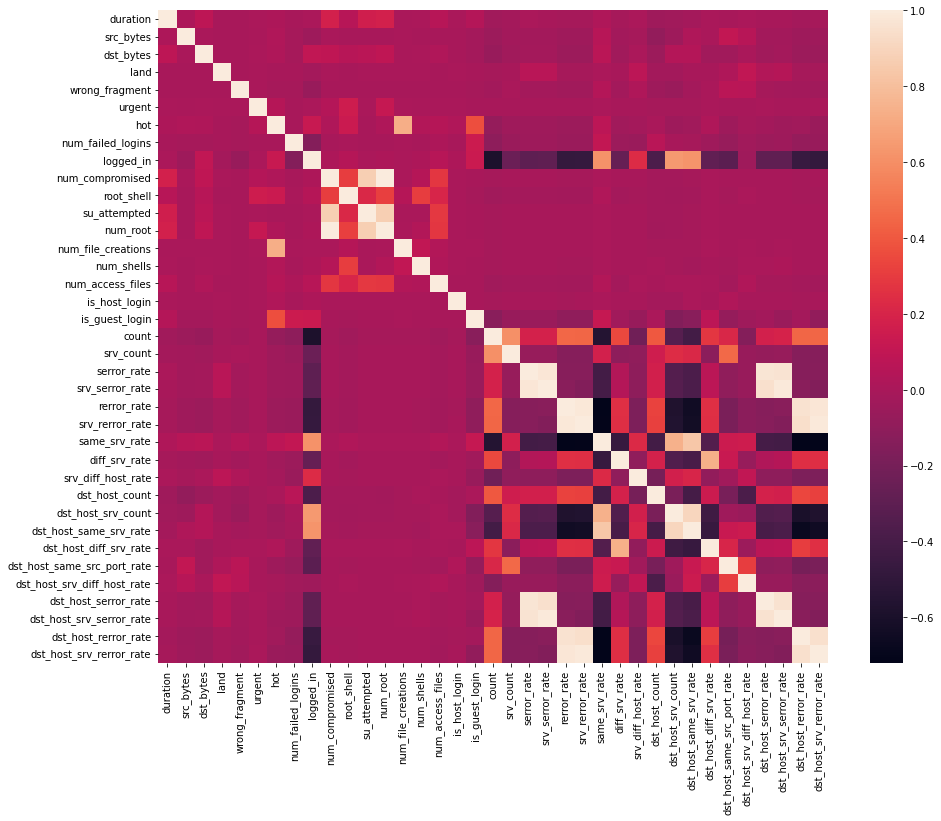

In [18]:
df=df.dropna()# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize =(15, 12))

sns.heatmap(corr)

plt.show()


In [19]:
def datapreproccessing(df):
    df.drop(['num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','dst_host_same_srv_rate'],axis =1, inplace = True)
    df['protocol_type'] = df['protocol_type'].map({'icmp':0, 'tcp':1, 'udp':2})
    df['flag'] = df['flag'].map({'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10})
    df.drop('service', axis = 1, inplace = True)
    print("Preprocessing done")
    return df
    

In [20]:
df=datapreproccessing(df)
df

Preprocessing done


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,2,0,0,0,0,0,0,0,...,0.04,0.06,0.00,255,10,0.06,0.00,0.00,neptune,dos
1,0,1,2,0,0,0,0,0,0,0,...,0.01,0.06,0.00,255,1,0.06,0.00,0.00,neptune,dos
2,2,1,0,12983,0,0,0,0,0,0,...,1.00,0.00,0.00,134,86,0.04,0.61,0.02,normal,normal
5,0,1,0,267,14515,0,0,0,0,0,...,1.00,0.00,0.00,155,255,0.00,0.01,0.03,normal,normal
6,0,1,0,1022,387,0,0,0,0,0,...,1.00,0.00,1.00,255,28,0.72,0.00,0.00,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,0,0,1032,0,0,0,0,0,0,...,1.00,0.00,0.00,255,255,0.00,1.00,0.00,smurf,dos
22539,0,1,0,794,333,0,0,0,0,0,...,1.00,0.00,0.00,100,141,0.06,0.01,0.01,normal,normal
22540,0,1,0,317,938,0,0,0,0,0,...,1.00,0.00,0.18,197,255,0.00,0.01,0.01,normal,normal
22541,0,1,0,54540,8314,0,0,0,2,0,...,1.00,0.00,0.20,255,255,0.00,0.00,0.00,back,dos


In [21]:
dr=pd.DataFrame(df)
dr.to_csv("modifieddata.csv")
df = df.drop(['target', ], axis = 1)
df.to_numpy()
Y_train = df[['Attack Type']]
X_train = df.drop(['Attack Type', ], axis = 1)
X_train

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,1,2,0,0,0,0,0,0,0,...,0.0,1.0,0.04,0.06,0.00,255,10,0.06,0.00,0.00
1,0,1,2,0,0,0,0,0,0,0,...,0.0,1.0,0.01,0.06,0.00,255,1,0.06,0.00,0.00
2,2,1,0,12983,0,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,134,86,0.04,0.61,0.02
5,0,1,0,267,14515,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,155,255,0.00,0.01,0.03
6,0,1,0,1022,387,0,0,0,0,0,...,0.0,0.0,1.00,0.00,1.00,255,28,0.72,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,0,0,1032,0,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,255,255,0.00,1.00,0.00
22539,0,1,0,794,333,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,100,141,0.06,0.01,0.01
22540,0,1,0,317,938,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.18,197,255,0.00,0.01,0.01
22541,0,1,0,54540,8314,0,0,0,2,0,...,0.0,0.0,1.00,0.00,0.20,255,255,0.00,0.00,0.00


In [22]:

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clfg = GaussianNB()
start_time = time.time()
clfg.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)



Training time:  0.08112049102783203


In [23]:
from sklearn.svm import SVC
clfs = SVC(gamma = 'scale')
start_time = time.time()
clfs.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  54.33648133277893


In [24]:
from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  1.0293068885803223


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
  
clfgb = GradientBoostingClassifier(random_state = 0)
start_time = time.time()
clfgb.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

In [26]:
from sklearn import metrics
print("File reading done")
print("Preprocessing done")

models = []
values=[]
#models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', clfg))
models.append(("Support Vector Machine",clfs))
models.append(("Random Forest Classifier",clfr))
models.append(("Gradient Boosting Classifier",clfgb))

#models.append(('VotingClassifier', VotingClassifier))

for i, v in models:
    #scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    values.append(accuracy)
    
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    #print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

File reading done
Preprocessing done

============================== Naive Baye Classifier Model Evaluation ==============================


Model Accuracy:
 0.28828349473236137

Confusion matrix:
 [[ 719   90 4620  312    0]
 [3868 1797  291 3718   37]
 [   0    3 1089   14    0]
 [ 165    3  225 1804    2]
 [   3    1    0   24    9]]

Classification report:
               precision    recall  f1-score   support

         dos       0.15      0.13      0.14      5741
      normal       0.95      0.19      0.31      9711
       probe       0.17      0.98      0.30      1106
         r2l       0.31      0.82      0.45      2199
         u2r       0.19      0.24      0.21        37

    accuracy                           0.29     18794
   macro avg       0.35      0.47      0.28     18794
weighted avg       0.58      0.29      0.27     18794




C:\Users\Saicharith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saicharith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saicharith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== Support Vector Machine Model Evaluation ==============================


Model Accuracy:
 0.5438437799297648

Confusion matrix:
 [[ 331 5410    0    0    0]
 [  40 9669    0    2    0]
 [   0 1106    0    0    0]
 [   1 1977    0  221    0]
 [   0   35    0    2    0]]

Classification report:
               precision    recall  f1-score   support

         dos       0.89      0.06      0.11      5741
      normal       0.53      1.00      0.69      9711
       probe       0.00      0.00      0.00      1106
         r2l       0.98      0.10      0.18      2199
         u2r       0.00      0.00      0.00        37

    accuracy                           0.54     18794
   macro avg       0.48      0.23      0.20     18794
weighted avg       0.66      0.54      0.41     18794



============================== Random Forest Classifier Model Evaluation ==============================


Model Accuracy:
 0.9997339576460572

Confusion matrix:
 [[5741    0    0    

In [29]:
testdata=pd.read_csv("KDDTest+.csv")
testdata.drop("difficulty_level",axis=1,inplace=True)
testdata['Attack Type'] = testdata.target.map(attacks_types)
testdata=datapreproccessing(testdata)
c=testdata.columns
d=df.columns
for i in c:
    if i not in d:
        
        testdata.drop(i,axis=1,inplace=True)
testdata


Preprocessing done


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,2,0,0,0,0,0,0,0,...,1.0,0.04,0.06,0.00,255,10,0.06,0.00,0.00,dos
1,0,1,2,0,0,0,0,0,0,0,...,1.0,0.01,0.06,0.00,255,1,0.06,0.00,0.00,dos
2,2,1,0,12983,0,0,0,0,0,0,...,0.0,1.00,0.00,0.00,134,86,0.04,0.61,0.02,normal
3,0,0,0,20,0,0,0,0,0,0,...,0.0,1.00,0.00,1.00,3,57,0.00,1.00,0.28,NaN
4,1,1,4,0,15,0,0,0,0,0,...,1.0,1.00,0.00,0.75,29,86,0.17,0.03,0.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,0,794,333,0,0,0,0,0,...,0.0,1.00,0.00,0.00,100,141,0.06,0.01,0.01,normal
22540,0,1,0,317,938,0,0,0,0,0,...,0.0,1.00,0.00,0.18,197,255,0.00,0.01,0.01,normal
22541,0,1,0,54540,8314,0,0,0,2,0,...,0.0,1.00,0.00,0.20,255,255,0.00,0.00,0.00,dos
22542,0,2,0,42,42,0,0,0,0,0,...,0.0,1.00,0.00,0.33,255,252,0.01,0.00,0.00,normal


In [30]:

df.to_numpy()
Y_test = df[['Attack Type']]
X_test = df.drop(['Attack Type', ], axis = 1)

In [ ]:
from sklearn import metrics
print("File reading done")
print("Preprocessing done")

models = []
values=[]
#models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', clfg))
models.append(("Support Vector Machine",clfs))
models.append(("Random Forest Classifier",clfr))
models.append(("Gradient Boosting Classifier",clfgb))

#models.append(('VotingClassifier', VotingClassifier))

for i, v in models:
    #scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    values.append(accuracy)
    
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    #print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

File reading done
Preprocessing done

============================== Naive Baye Classifier Model Evaluation ==============================


Model Accuracy:
 0.28828349473236137

Confusion matrix:
 [[ 719   90 4620  312    0]
 [3868 1797  291 3718   37]
 [   0    3 1089   14    0]
 [ 165    3  225 1804    2]
 [   3    1    0   24    9]]

Classification report:
               precision    recall  f1-score   support

         dos       0.15      0.13      0.14      5741
      normal       0.95      0.19      0.31      9711
       probe       0.17      0.98      0.30      1106
         r2l       0.31      0.82      0.45      2199
         u2r       0.19      0.24      0.21        37

    accuracy                           0.29     18794
   macro avg       0.35      0.47      0.28     18794
weighted avg       0.58      0.29      0.27     18794




<BarContainer object of 4 artists>

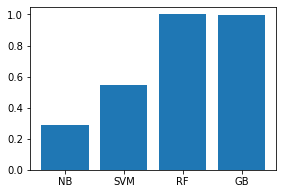

In [32]:
names = ['NB', 'SVM', 'RF','GB']

f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

In [ ]:
l=list(map(float,input("Enter the Data ").split(",")))

a=clfr.predict(l)
print(a)
if a[0]=="normal":
    print("Attack type: "+a[0])
elif a[0]=="u2r" or a[0]=="r2l" or a[0]=="dos" or a[0]=='probe':
    print("Attack type:",a[0])
